In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Oil production by country.csv')
df.head(10)

,Entity,Code,Year,Oil production (TWh)
0,Africa,NaN,1900,0.0
1,Africa,NaN,1901,0.0
2,Africa,NaN,1902,0.0
3,Africa,NaN,1903,0.0
4,Africa,NaN,1904,0.0
5,Africa,NaN,1905,0.0
6,Africa,NaN,1906,0.0
7,Africa,NaN,1907,0.0
8,Africa,NaN,1908,0.0
9,Africa,NaN,1909,0.0


In [2]:
df['Entity'].unique()

array(['Africa', 'Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Asia Pacific', 'Asia and Oceania', 'Australia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Bangladesh', 'Belarus', 'Belgium',
       'Benin', 'Bolivia', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
       'CIS', 'Cambodia', 'Cameroon', 'Canada',
       'Central and South America', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Denmark',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Eurasia',
       'Europe', 'European Union', 'Finland', 'France', 'Gabon',
       'Georgia', 'Germany', 'Ghana', 'Gibraltar', 'Greece', 'Guatemala',
       'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia',
       'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Kyrgyzstan',
       'Latvia', 'Lebanon', 'Li

## Visualising the trend of oil production by individual country/region

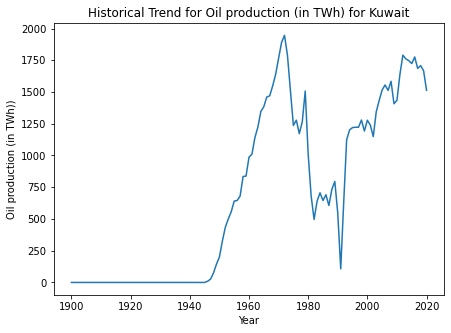

In [3]:
country_name = 'Kuwait'
country = df.loc[df['Entity'] == country_name]

plt.figure(figsize = (7, 5))

plt.plot(country['Year'], country['Oil production (TWh)'])

plt.title('Historical Trend for Oil production (in TWh) for {0}'.format(country_name))
plt.xlabel('Year')
plt.ylabel('Oil production (in TWh))')

plt.show()

## Splitting Data Frame into 2 Data Frames: 1 for regions, and 1 for individual countries

In [4]:
df

,Entity,Code,Year,Oil production (TWh)
0,Africa,NaN,1900,0.0
1,Africa,NaN,1901,0.0
2,Africa,NaN,1902,0.0
3,Africa,NaN,1903,0.0
4,Africa,NaN,1904,0.0
...,...,...,...,...
11033,Zimbabwe,ZWE,2012,0.0
11034,Zimbabwe,ZWE,2013,0.0
11035,Zimbabwe,ZWE,2014,0.0
11036,Zimbabwe,ZWE,2015,0.0


### Sort by region

In [5]:
non_countries = ['Africa', 'Asia Pacific', 'Asia and Oceania', 'CIS', 'Central America',
                 'Central and South America', 'Eurasia', 'Europe', 'European Union', 'Middle Africa', 
                 'Middle East', 'Non-OECD', 'North America', 'OECD', 'OPEC', 'Persian Gulf',
                 'Russian Federation & USSR', 'USSR', 'Western Africa', 'World']

In [6]:
df_region = df[df['Entity'].isin(non_countries)]
df_region

,Entity,Code,Year,Oil production (TWh)
0,Africa,NaN,1900,0.000
1,Africa,NaN,1901,0.000
2,Africa,NaN,1902,0.000
3,Africa,NaN,1903,0.000
4,Africa,NaN,1904,0.000
...,...,...,...,...
10918,World,OWID_WRL,2016,50882.192
10919,World,OWID_WRL,2017,51007.482
10920,World,OWID_WRL,2018,52151.154
10921,World,OWID_WRL,2019,52078.999


### Sort by country

In [7]:
df_country = df[~df['Entity'].isin(non_countries)]
df_country

,Entity,Code,Year,Oil production (TWh)
121,Albania,ALB,1900,0.0
122,Albania,ALB,1901,0.0
123,Albania,ALB,1902,0.0
124,Albania,ALB,1903,0.0
125,Albania,ALB,1904,0.0
...,...,...,...,...
11033,Zimbabwe,ZWE,2012,0.0
11034,Zimbabwe,ZWE,2013,0.0
11035,Zimbabwe,ZWE,2014,0.0
11036,Zimbabwe,ZWE,2015,0.0


## Top 10 countries with highest average oil production

In [8]:
cop = df_country.groupby('Entity')['Oil production (TWh)'].mean()
cop10 = cop.nlargest(10)
df_cop10 = pd.DataFrame(cop10)
df_cop10

,Oil production (TWh)
Entity,
Russia,5405.911250
Saudi Arabia,4638.212929
United States,3391.029810
Iran,2119.249946
Venezuela,1622.499089
United Arab Emirates,1205.552464
China,721.862264
Kuwait,691.703893
Mexico,687.382512


In [9]:
df_cop10.index

Index(['Russia', 'Saudi Arabia', 'United States', 'Iran', 'Venezuela',
       'United Arab Emirates', 'China', 'Kuwait', 'Mexico', 'Canada'],
      dtype='object', name='Entity')

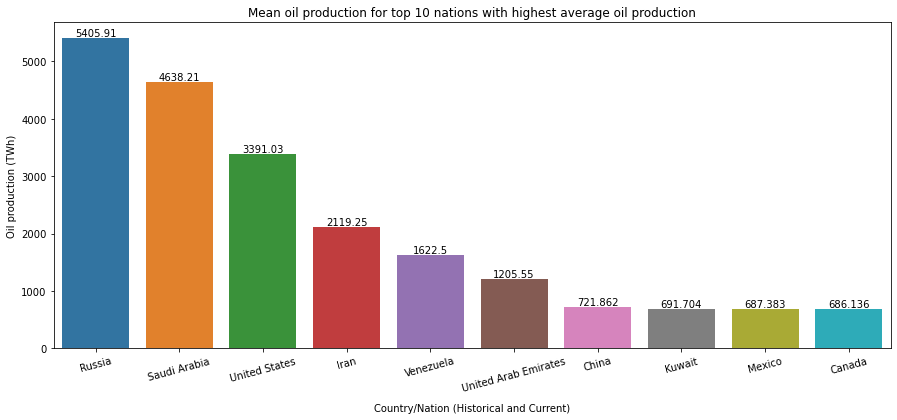

In [10]:
plt.figure(figsize = (15, 6))
plt.style.use('default')

ax = sns.barplot(x = df_cop10.index, y = 'Oil production (TWh)', data = df_cop10)
ax.bar_label(ax.containers[0])

plt.title('Mean oil production for top 10 nations with highest average oil production')
plt.xticks(rotation = 15)
plt.xlabel('Country/Nation (Historical and Current)', labelpad = 10)

plt.show()

## Historical Trend of top 10 countries with highest oil production (in TWh) in the year of 2020

In [11]:
op2020 = df_country.loc[df_country['Year'] == 2020]
topc = op2020.nlargest(10, 'Oil production (TWh)')
topc

,Entity,Code,Year,Oil production (TWh)
10638,United States,USA,2020,8289.033
8969,Russia,RUS,2020,6098.821
9142,Saudi Arabia,SAU,2020,6042.749
2249,Canada,CAN,2020,2932.932
5458,Iraq,IRQ,2020,2349.700
2623,China,CHN,2020,2265.163
10396,United Arab Emirates,ARE,2020,1926.187
1680,Brazil,BRA,2020,1851.390
5337,Iran,IRN,2020,1660.025
6127,Kuwait,KWT,2020,1513.612


In [13]:
df_top10op = df_country[df_country['Entity'].isin(topc['Entity'].values)]
df_top10op

,Entity,Code,Year,Oil production (TWh)
1560,Brazil,BRA,1900,0.000
1561,Brazil,BRA,1901,0.000
1562,Brazil,BRA,1902,0.000
1563,Brazil,BRA,1903,0.000
1564,Brazil,BRA,1904,0.000
...,...,...,...,...
10634,United States,USA,2016,6314.502
10635,United States,USA,2017,6685.594
10636,United States,USA,2018,7794.890
10637,United States,USA,2019,8697.417


### Rearranging list for ordered plt.legend()

In [14]:
entity_sort = list(topc.sort_values('Entity')['Entity'].values)
entity_sort

['Brazil',
 'Canada',
 'China',
 'Iran',
 'Iraq',
 'Kuwait',
 'Russia',
 'Saudi Arabia',
 'United Arab Emirates',
 'United States']

In [15]:
new_sort = list(topc['Entity'])
new_sort 

['United States',
 'Russia',
 'Saudi Arabia',
 'Canada',
 'Iraq',
 'China',
 'United Arab Emirates',
 'Brazil',
 'Iran',
 'Kuwait']

In [16]:
ord_list = [entity_sort.index(item) for item in new_sort if item in entity_sort]
ord_list

[9, 6, 7, 1, 4, 2, 8, 0, 3, 5]

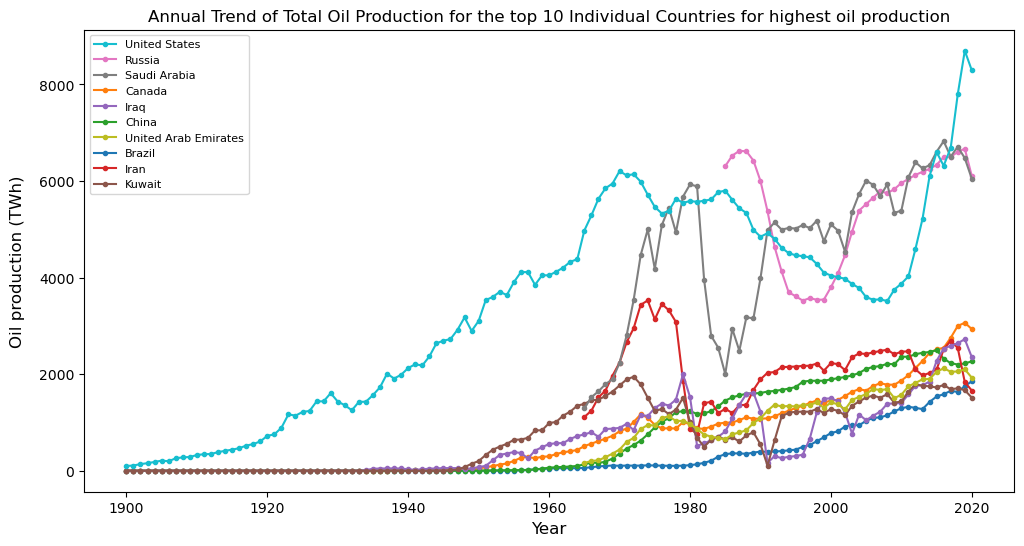

In [17]:
fig, ax = plt.subplots(figsize = (12, 6))

for opc, group in df_top10op.groupby('Entity'):
    group.plot(x = 'Year', y = 'Oil production (TWh)', ax = ax, label = opc, marker = '.')

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Oil production (TWh)', labelpad = 10, fontsize = 12)
plt.title('Annual Trend of Total Oil Production for the top 10 Individual Countries for highest oil production')

handles, labels = plt.gca().get_legend_handles_labels()
order = ord_list
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'upper left', fontsize = 8)

plt.show()

## Historical YoY Trend of all oil production in all oil-producing regions of the world

In [18]:
df_region

,Entity,Code,Year,Oil production (TWh)
0,Africa,NaN,1900,0.000
1,Africa,NaN,1901,0.000
2,Africa,NaN,1902,0.000
3,Africa,NaN,1903,0.000
4,Africa,NaN,1904,0.000
...,...,...,...,...
10918,World,OWID_WRL,2016,50882.192
10919,World,OWID_WRL,2017,51007.482
10920,World,OWID_WRL,2018,52151.154
10921,World,OWID_WRL,2019,52078.999


In [46]:
topr = df_region.groupby('Entity')['Oil production (TWh)'].mean().sort_values()
topr

Entity
European Union                 393.101857
Europe                        1058.261074
Asia and Oceania              1663.419821
Africa                        1793.679851
Central and South America     1812.550256
Russian Federation & USSR     2768.093026
Eurasia                       3038.988667
Asia Pacific                  3408.790964
USSR                          5360.813050
Persian Gulf                  5398.403026
Middle East                   5694.722215
OECD                          5978.294264
CIS                           6077.351143
OPEC                          7537.809855
World                        19840.351116
Non-OECD                     27788.292429
Name: Oil production (TWh), dtype: float64

### Rearranging list for ordered plt.legend()

In [38]:
entity_sort = list(df_region['Entity'].unique())
entity_sort

['Africa',
 'Asia Pacific',
 'Asia and Oceania',
 'CIS',
 'Central and South America',
 'Eurasia',
 'Europe',
 'European Union',
 'Middle East',
 'Non-OECD',
 'OECD',
 'OPEC',
 'Persian Gulf',
 'Russian Federation & USSR',
 'USSR',
 'World']

In [48]:
new_sort = list(topr.index)
new_sort.reverse() 
new_sort

['Non-OECD',
 'World',
 'OPEC',
 'CIS',
 'OECD',
 'Middle East',
 'Persian Gulf',
 'USSR',
 'Asia Pacific',
 'Eurasia',
 'Russian Federation & USSR',
 'Central and South America',
 'Africa',
 'Asia and Oceania',
 'Europe',
 'European Union']

In [49]:
ord_list = [entity_sort.index(item) for item in new_sort if item in entity_sort]
ord_list

[9, 15, 11, 3, 10, 8, 12, 14, 1, 5, 13, 4, 0, 2, 6, 7]

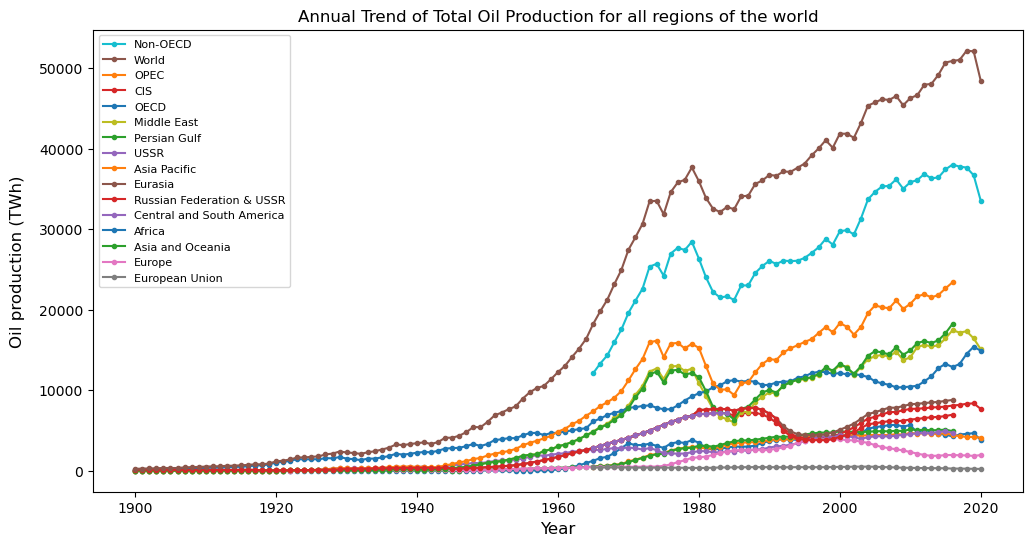

In [50]:
fig, ax = plt.subplots(figsize = (12, 6))

for opr, group in df_region.groupby('Entity'):
    group.plot(x = 'Year', y = 'Oil production (TWh)', ax = ax, label = opr, marker = '.')

plt.xlabel('Year', fontsize = 12)
plt.ylabel('Oil production (TWh)', labelpad = 10, fontsize = 12)
plt.title('Annual Trend of Total Oil Production for all regions of the world')

handles, labels = plt.gca().get_legend_handles_labels()
order = ord_list
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order], loc = 'upper left', fontsize = 8)

plt.show()